
# Estimation of Engineering_graduate_salary-project


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

 ##Problem: Estimate Engineering Salary
 ##importing reqired libraries


## Import Data
### Read Engineering_graduate_salary
import **pandas** function to read .CSV file
the name of the data frame **SAL**
identify  **head** function is used to display the data (5 records) for intial understanding


In [82]:
import pandas as pd

SAL = pd.read_csv('Engineering_graduate_salary.csv')

SAL.head()

,ID,Gender,12graduation,CollegeID,Degree,Specialization,collegeGPA,CollegeCityID,CollegeState,GraduationYear,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,Salary
0,604399,f,2009,6920,B.Tech/B.E.,instrumentation and control engineering,73.820,6920,Delhi,2013,485,366,-1,-1,-1,-1,-1,-0.159,0.379,445000
1,988334,m,2010,6624,B.Tech/B.E.,computer science & engineering,65.000,6624,Uttar Pradesh,2014,365,-1,-1,-1,-1,-1,-1,1.134,0.046,110000
2,301647,m,2007,9084,B.Tech/B.E.,electronics & telecommunications,61.940,9084,Maharashtra,2011,-1,400,-1,-1,-1,260,-1,0.510,-0.123,255000
3,582313,m,2009,8195,B.Tech/B.E.,computer science & engineering,80.400,8195,Delhi,2013,655,-1,-1,-1,-1,-1,-1,-0.446,0.212,420000
4,339001,f,2008,4889,B.Tech/B.E.,biotechnology,64.300,4889,Tamil Nadu,2012,315,-1,-1,-1,-1,-1,-1,-1.499,-0.747,200000


The **shape** function displays the number of rows(2998) and Features(20) in the data set

In [83]:
SAL.shape    # check dimension

(2998, 20)

**Isnull** function using for checking all data set for any null values or empty. SAL data set showing all features and records correct.
also  Using
 (. sum) function to show total number of null values.

In [84]:
SAL.isnull().sum()

ID                       0
Gender                   0
12graduation             0
CollegeID                0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeState             0
GraduationYear           0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
Salary                   0
dtype: int64

in the SAL data set result showing all data correct with out any errors or empty records.
In case if there any null or empty values its required to apply **(. dropna)** function to clear unnecessariness records with empty data.

**(.dtypes)**function using For checking data types in SAL data set showing (3) types : int64 for integer ,object for string and floating point.

In [85]:
SAL.dtypes    # checking the data type of every column

ID                         int64
Gender                    object
12graduation               int64
CollegeID                  int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeState              object
GraduationYear             int64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscientiousness        float64
agreeableness            float64
Salary                     int64
dtype: object

Checking the correlation between the numerical features and target

## EDA (Exploratory Data Analysis)
Visualizations are using to understand the relationship between the target variable and the features in a simple step with quantitative metrics such as correlation coefficient and p-value.In our case will use both regression plots to show relationship between variables via mathematical statistics to get numerical values and using box blots to get categorical data.

In [86]:
SAL.describe()   #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered 16 of 20

,ID,12graduation,CollegeID,collegeGPA,CollegeCityID,GraduationYear,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,Salary
count,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000
mean,664892.583,2008.081,5210.211,71.510,5210.211,2011.940,351.869,96.228,94.147,24.139,16.268,31.068,1.947,-0.039,0.126,305174.783
std,364895.077,1.632,4776.610,8.122,4776.610,36.781,204.526,158.738,177.785,99.785,86.055,103.553,32.242,1.025,0.956,212331.194
min,11244.000,1998.000,2.000,6.630,2.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-3.893,-5.782,35000.000
25%,333464.750,2007.000,526.250,66.530,526.250,2012.000,295.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.649,-0.435,180000.000
50%,639694.500,2008.000,4027.500,71.800,4027.500,2013.000,415.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.046,0.212,300000.000
75%,995177.000,2009.000,8822.250,76.300,8822.250,2014.000,495.000,233.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.703,0.813,370000.000
max,1297877.000,2012.000,18409.000,99.930,18409.000,2017.000,804.000,612.000,715.000,623.000,660.000,548.000,500.000,1.995,1.905,4000000.000


In the EDA (Exploratory Data Analysis) will start with **describe** function to demonstrate total features with numeric data for statistics of a Data Frame its showing 16 of 20 features.

In [87]:
import pandas as pd

# Set display options to show full numbers instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Now when you use .describe(), the numeric values will be displayed in standard decimal format

In [88]:
SAL.describe()

,ID,12graduation,CollegeID,collegeGPA,CollegeCityID,GraduationYear,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,Salary
count,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000
mean,664892.583,2008.081,5210.211,71.510,5210.211,2011.940,351.869,96.228,94.147,24.139,16.268,31.068,1.947,-0.039,0.126,305174.783
std,364895.077,1.632,4776.610,8.122,4776.610,36.781,204.526,158.738,177.785,99.785,86.055,103.553,32.242,1.025,0.956,212331.194
min,11244.000,1998.000,2.000,6.630,2.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-3.893,-5.782,35000.000
25%,333464.750,2007.000,526.250,66.530,526.250,2012.000,295.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.649,-0.435,180000.000
50%,639694.500,2008.000,4027.500,71.800,4027.500,2013.000,415.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.046,0.212,300000.000
75%,995177.000,2009.000,8822.250,76.300,8822.250,2014.000,495.000,233.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.703,0.813,370000.000
max,1297877.000,2012.000,18409.000,99.930,18409.000,2017.000,804.000,612.000,715.000,623.000,660.000,548.000,500.000,1.995,1.905,4000000.000


1.	Count: the total number of value in the data set (2998) records and showing it in all columns.
2.	Mean: showing average of each column.
3.	Standard Deviation (std): A measure much of values got deviated.
4.	Minimum: The minimum value in each column will focus in our target (Salary) column and its showing 35000.
5.	25th Percentile (25%): The value below which 25% of the data falls (1st quartile). Means 25% of the entire data falls under the value -0.866 for ID
6.	50th Percentile (50%): The median or value below which 50% of the data falls (2nd quartile).
7.	75th Percentile (75%): The value below which 75% of the data falls (3rd quartile).
8.	Maximum: The maximum (largest) value in the Series example Salary 4000000.


#Looking at the "minimum Salary", 35000 USD is found.
#There is no wrong entry (or an outlier)



In [89]:
SAL.describe()

,ID,12graduation,CollegeID,collegeGPA,CollegeCityID,GraduationYear,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,Salary
count,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000,2998.000
mean,664892.583,2008.081,5210.211,71.510,5210.211,2011.940,351.869,96.228,94.147,24.139,16.268,31.068,1.947,-0.039,0.126,305174.783
std,364895.077,1.632,4776.610,8.122,4776.610,36.781,204.526,158.738,177.785,99.785,86.055,103.553,32.242,1.025,0.956,212331.194
min,11244.000,1998.000,2.000,6.630,2.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-3.893,-5.782,35000.000
25%,333464.750,2007.000,526.250,66.530,526.250,2012.000,295.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.649,-0.435,180000.000
50%,639694.500,2008.000,4027.500,71.800,4027.500,2013.000,415.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.046,0.212,300000.000
75%,995177.000,2009.000,8822.250,76.300,8822.250,2014.000,495.000,233.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.703,0.813,370000.000
max,1297877.000,2012.000,18409.000,99.930,18409.000,2017.000,804.000,612.000,715.000,623.000,660.000,548.000,500.000,1.995,1.905,4000000.000


when using **describe(incoude= object) function will show all categorical values in data set as we have 4 Gender,Degree,Specialization,CollegeState
* count of recordes are same in all columns 2998
* unique showing values like Gender 2 Male and Female Specialization showing 42 numbers the top one electronics and communication engineering
* top showing Males higher
* in freq showing that Males total number 2282 of 2998 in electronics and communication engineering showing 670 stuff in the same specialization


In [90]:
SAL.describe(include = 'object')   #summary statistics for categorical values

,Gender,Degree,Specialization,CollegeState
count,2998,2998,2998,2998
unique,2,4,42,26
top,m,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,2282,2757,670,698


### Regression plot
a regression plot demonstrate linear relationship correlation between two variables in a dataset,variable predictor**Salary** and the other is the dependent variable **Graduation Year**.

<Axes: xlabel='GraduationYear', ylabel='Salary'>

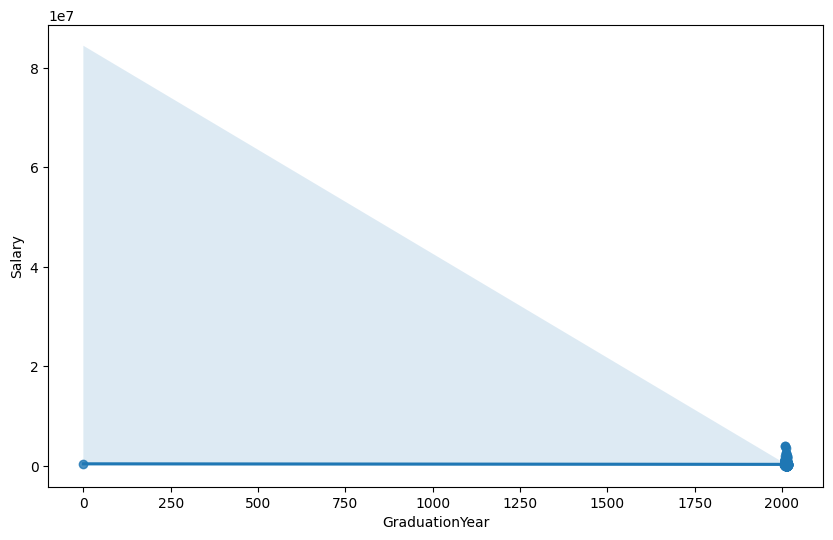

In [91]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="GraduationYear", y="Salary", data=SAL)


As observed in the plot above, a **linear relationship correlation** is observed

In [92]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(SAL['GraduationYear'], SAL['Salary'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.009332589612533682  with a P-value of P = 0.6094948961685803


the Pearson correlation Coefficient -0.00933 is obtained along with a p-value of 0.60

-- The Pearson Correlation Coefficient (r) is a measure of the linear relationship between two variables. the values between -1 and 1



The regression plot below shows a relationship between the year that the GraduationYear is produced and the Salary. A positive
correlation is observed between the two variables. This shows that the Salary increases with increase in experince year of the Engeneer.

The Pearson Correlation Coefficient is -0.009332589612533682  with a P-value of P = 0.6094948961685803


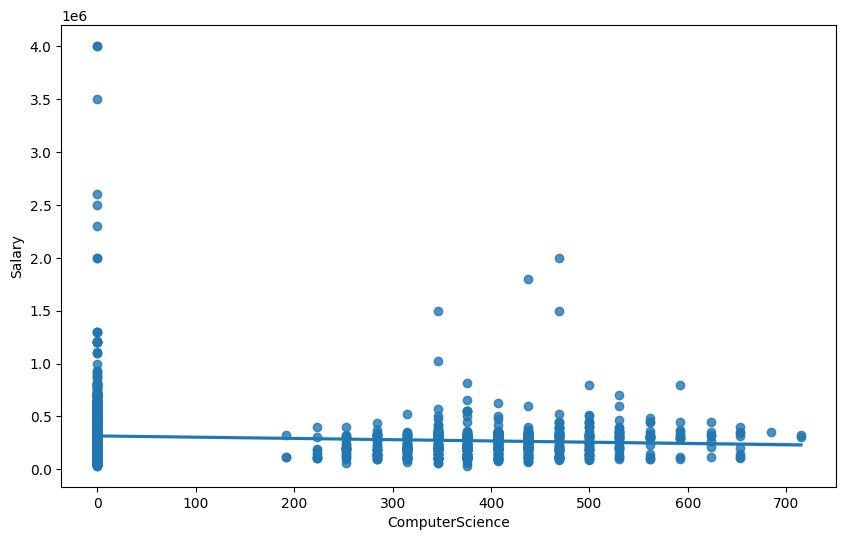

In [93]:
plt.figure(figsize=(10,6))
sns.regplot(x="ComputerScience", y="Salary", data=SAL)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

As observed above, a negative correlation of 0.03 is calculated along with the p-value of 0.76. This indicates that the correlation between the variables is significant hence year produced feature can be used for prediction.

-----check for correlation between 'agreeableness' and 'Salary'------------

The Pearson Correlation Coefficient is -0.009332589612533682  with a P-value of P = 0.6094948961685803


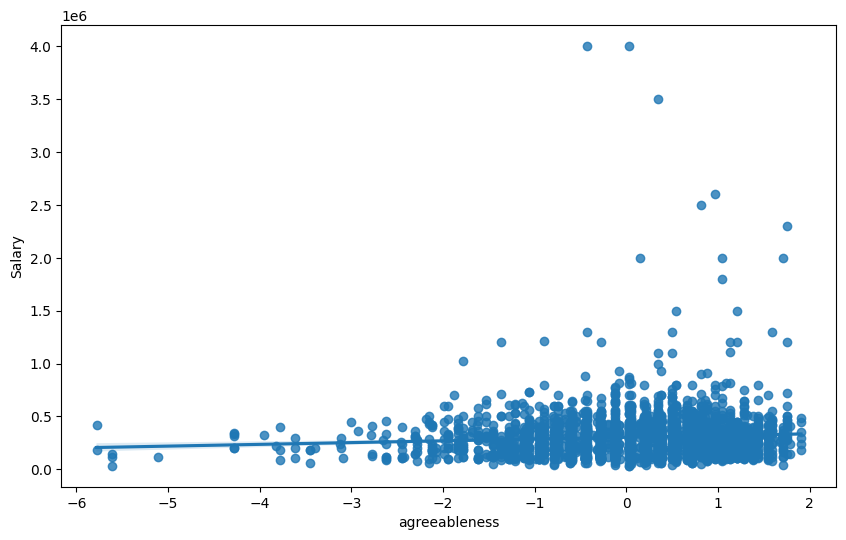

In [94]:
plt.figure(figsize=(10,6))
sns.regplot(x="agreeableness", y="Salary", data=SAL)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The correlation is 0.032 based on the calculation while the p-value calculated is 076 This is similar to the previous feature hence significant by 74% of 100 correlation makes this feature eligble for prediction along with 076 p-value.

The Pearson Correlation Coefficient is 0.07475611977060262  with a P-value of P = 4.1813588526313086e-05


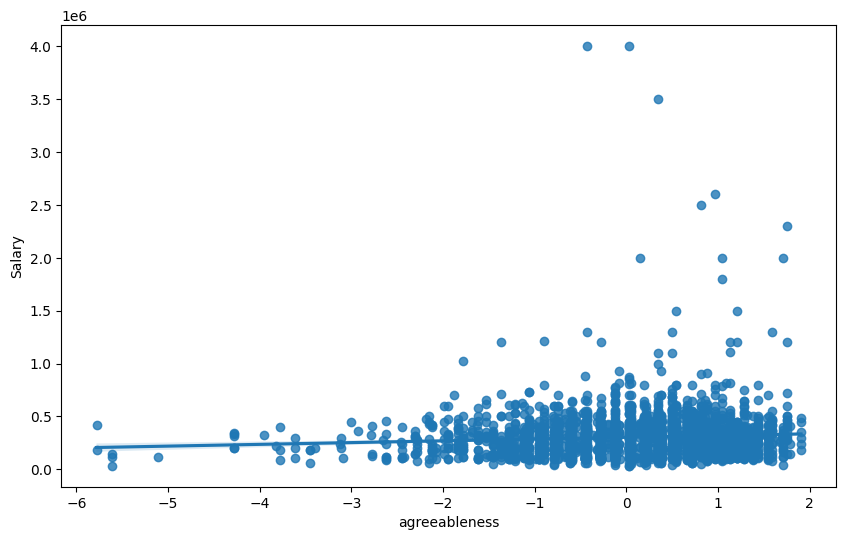

In [95]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
sns.regplot(x="agreeableness", y="Salary", data=SAL)

pearson_coef, p_value = stats.pearsonr(SAL['agreeableness'], SAL['Salary'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

-------check correlation b/w ElectronicsAndSemicon and Salary-------------

The Pearson Correlation Coefficient is 0.07475611977060262  with a P-value of P = 4.1813588526313086e-05


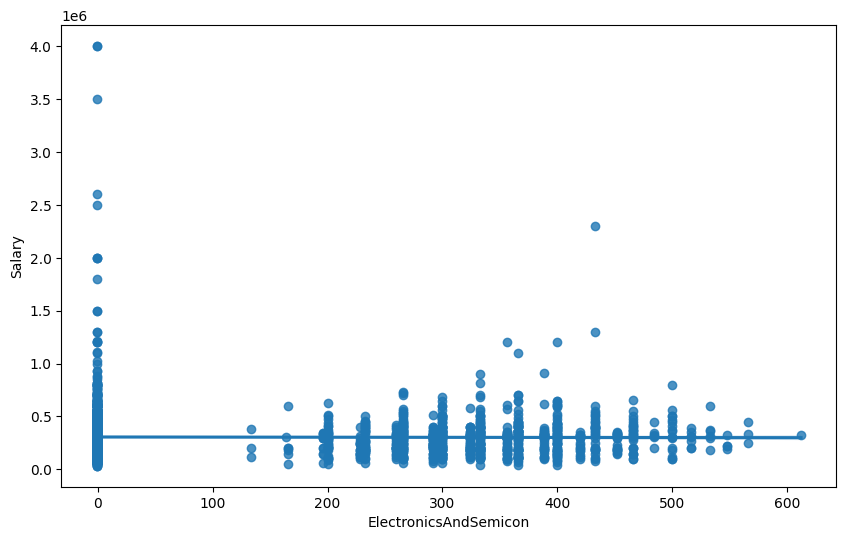

In [96]:
plt.figure(figsize=(10,6))
sns.regplot(x="ElectronicsAndSemicon", y="Salary", data=SAL)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

*The* calculation below proves that the correlation is lesser than 0.0.032percent and indicates no correlation and the p-value lesser than 0.05 confirms it. This feature is not a critical feature for predicition


In [97]:
pearson_coef, p_value = stats.pearsonr(SAL['ElectronicsAndSemicon'], SAL['Salary'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.008085355279740062  with a P-value of P = 0.6581070875179164


<Axes: xlabel='MechanicalEngg', ylabel='Salary'>

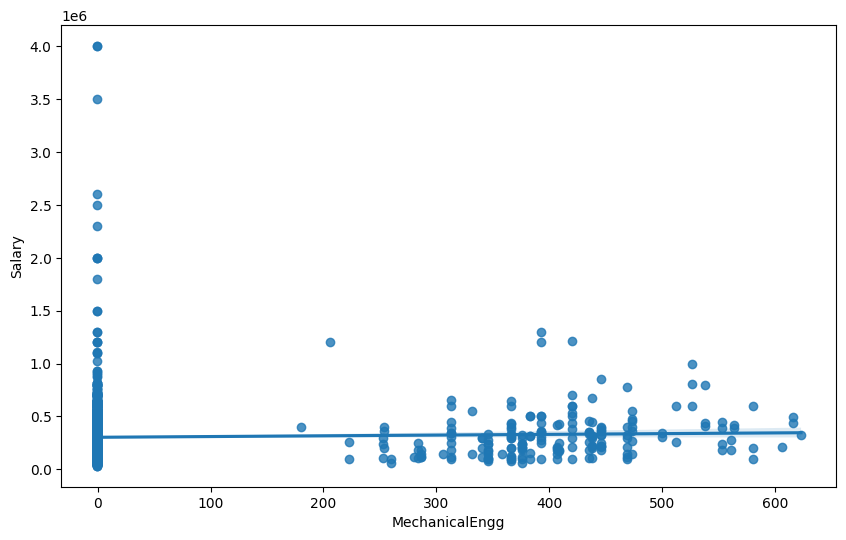

In [98]:
plt.figure(figsize=(10,6))
sns.regplot(x="MechanicalEngg", y="Salary", data=SAL)

In [99]:
pearson_coef, p_value = stats.pearsonr(SAL['MechanicalEngg'], SAL['Salary'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.03233258075584617  with a P-value of P = 0.07671673668531019


### Box Plot
These plots are used for categorical data to determine the importance of features for prediction.

In the given plot below, it is observed that the Salary range vary for conscientiousness. This indicates the categories can vary with Salary hence feature can be used for prediction

<Axes: xlabel='conscientiousness', ylabel='Salary'>

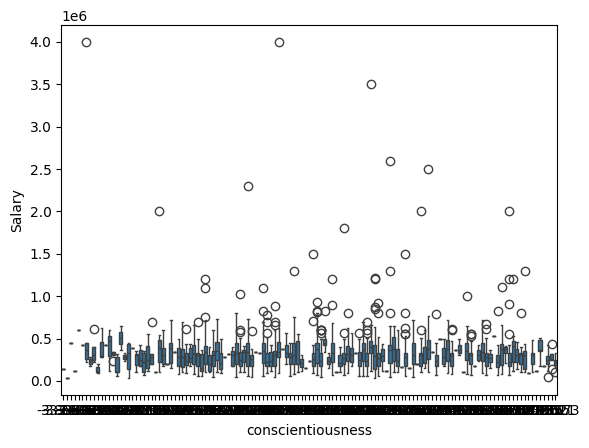

In [100]:
sns.boxplot(x="conscientiousness", y="Salary", data=SAL)

The box plot shows how Salaries vary based on different colors. This shows that color can be used as a feature for Salary prediction.

<Axes: xlabel='TelecomEngg', ylabel='Salary'>

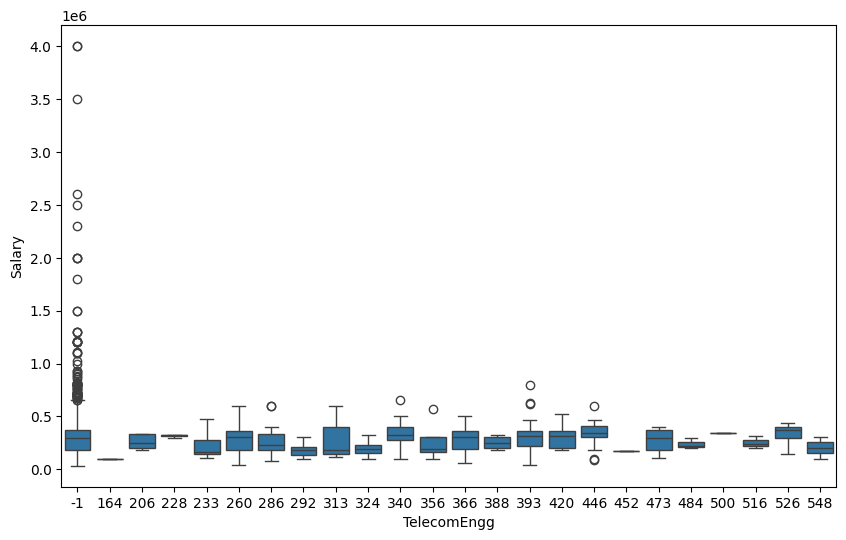

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(x="TelecomEngg", y="Salary", data=SAL)

This plot shows 12graduation and how they affect the Salary.  the highest Salary range 2004 and 2005. This feature can be used for prediction.

<Axes: xlabel='12graduation', ylabel='Salary'>

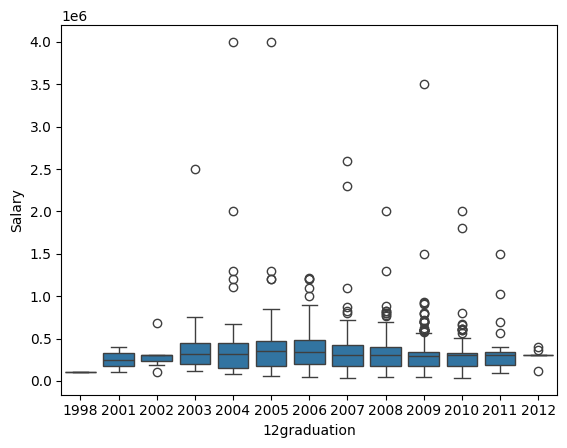

In [102]:
sns.boxplot(x="12graduation", y="Salary", data=SAL)

The box plot below shows Specialization with varying pricesSAlary per category hence this feature can be used for SAlary prediction, not so signficant though

<Axes: xlabel='Specialization', ylabel='Salary'>

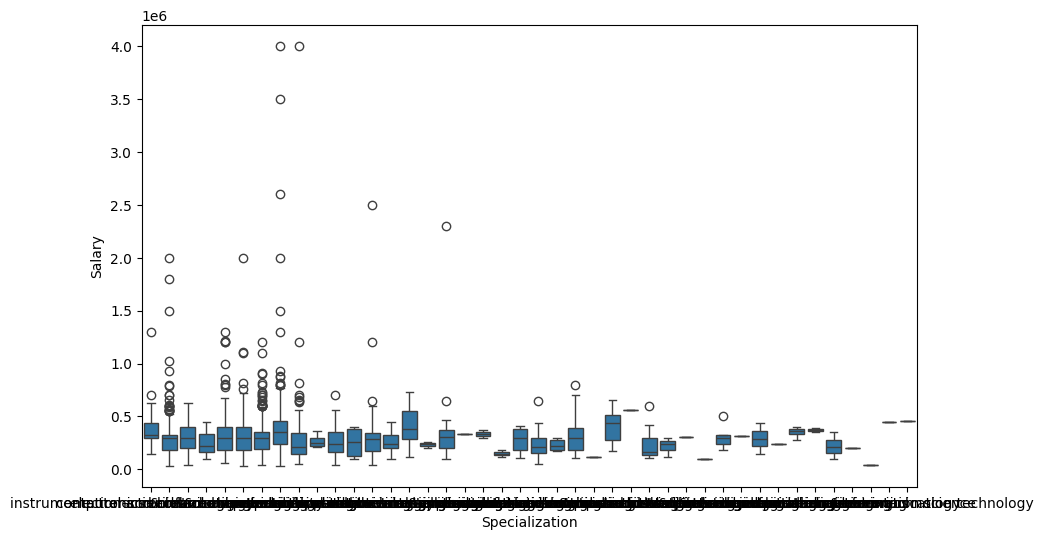

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Specialization", y="Salary", data=SAL)

<Axes: xlabel='Gender', ylabel='Salary'>

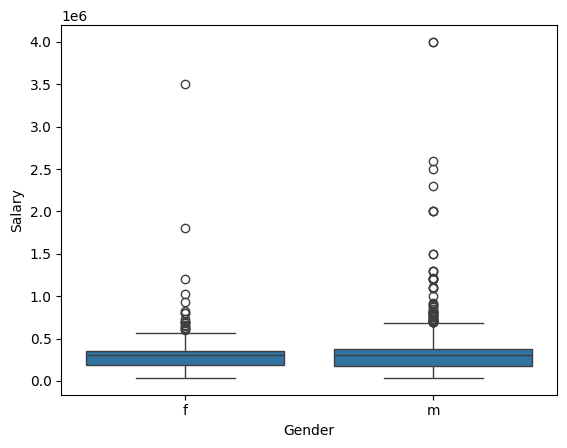

In [104]:
sns.boxplot(x="Gender", y="Salary", data=SAL)

Using Exploratory data analysis, few features can be dropped because they had no impact on the price prediction. Those features are removed with the function below.

In [105]:
SAL.drop(['12graduation', 'CollegeID', 'collegeGPA','CollegeCityID'], axis = 1, inplace = True)

In [106]:
SAL.shape   #4 features are removed

(2998, 16)

### Data Transformation
Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

----Data Preparation--------

In [107]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
SAL.Gender = labelencoder.fit_transform(SAL.Gender)
SAL.Degree = labelencoder.fit_transform(SAL.Degree)
SAL.Specialization = labelencoder.fit_transform(SAL.Specialization)
SAL.CollegeState = labelencoder.fit_transform(SAL.CollegeState)

appling label encoding function for 4 categorical features change it to numerical values as following Gender,Degree,Specialization and CollegeState.

In [108]:
SAL.head(10)

,ID,Gender,Degree,Specialization,CollegeState,GraduationYear,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,Salary
0,604399,0,0,33,4,2013,485,366,-1,-1,-1,-1,-1,-0.159,0.379,445000
1,988334,1,0,12,23,2014,365,-1,-1,-1,-1,-1,-1,1.134,0.046,110000
2,301647,1,0,19,14,2011,-1,400,-1,-1,-1,260,-1,0.510,-0.123,255000
3,582313,1,0,12,4,2013,655,-1,-1,-1,-1,-1,-1,-0.446,0.212,420000
4,339001,0,0,4,20,2012,315,-1,-1,-1,-1,-1,-1,-1.499,-0.747,200000
5,609356,0,2,33,17,2013,455,300,-1,-1,-1,313,-1,0.846,-0.620,440000
6,1081649,0,0,37,25,2013,-1,-1,-1,469,-1,-1,-1,0.128,-0.454,150000
7,610842,0,0,12,21,2013,465,-1,-1,-1,-1,-1,-1,0.128,0.545,105000
8,1183070,1,0,32,0,2014,525,-1,438,-1,-1,-1,-1,-0.159,-0.454,195000
9,794062,0,0,12,23,2014,385,-1,407,-1,-1,-1,-1,-0.734,-0.454,200000


AS showing result the values Exceeds range -1 to 1 machine learning will not work. required to apply normalization z-score function used for scaling down the features between the range of -1 and 1

In [109]:
!pip install scipy

In [110]:
import numpy as np
SAL = SAL.select_dtypes(include=[np.number])

In [111]:
# Calculate the z-score with scipy
import scipy.stats as stats
SAL = stats.zscore(SAL)


In [112]:
SAL

,ID,Gender,Degree,Specialization,CollegeState,GraduationYear,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,Salary
0,-0.166,-1.785,-0.293,1.497,-1.722,0.029,0.651,1.700,-0.535,-0.252,-0.201,-0.310,-0.091,-0.117,0.264,0.659
1,0.887,0.560,-0.293,-0.811,0.934,0.056,0.064,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,1.144,-0.084,-0.919
2,-0.996,0.560,-0.293,-0.041,-0.324,-0.026,-1.726,1.914,-0.535,-0.252,-0.201,2.211,-0.091,0.535,-0.261,-0.236
3,-0.226,0.560,-0.293,-0.811,-1.722,0.029,1.482,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,-0.398,0.090,0.541
4,-0.893,-1.785,-0.293,-1.690,0.514,0.002,-0.180,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,-1.425,-0.914,-0.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,-1.540,-1.785,-0.293,0.069,0.514,-0.053,-0.523,1.492,-0.535,-0.252,-0.201,-0.310,-0.091,-1.124,0.882,-0.872
2994,-0.855,-1.785,-0.293,1.387,0.514,0.002,-0.180,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,-0.068,-0.098,-0.872
2995,-1.036,0.560,-0.293,1.387,-0.464,-0.026,0.407,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,-0.822,0.065,0.376
2996,-0.953,0.560,-0.293,-1.030,-0.743,-0.026,0.944,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,1.440,1.208,1.059


after appling z- score function now all the values in the proper range

X train will be all the features 15 columns starting from 0-14
Y train will be the index location target will be 15


In [113]:
x_train=SAL.iloc[:,0:14]
y_train=SAL.iloc[:,15]

In [114]:
x_train.head()

,ID,Gender,Degree,Specialization,CollegeState,GraduationYear,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness
0,-0.166,-1.785,-0.293,1.497,-1.722,0.029,0.651,1.700,-0.535,-0.252,-0.201,-0.310,-0.091,-0.117
1,0.887,0.560,-0.293,-0.811,0.934,0.056,0.064,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,1.144
2,-0.996,0.560,-0.293,-0.041,-0.324,-0.026,-1.726,1.914,-0.535,-0.252,-0.201,2.211,-0.091,0.535
3,-0.226,0.560,-0.293,-0.811,-1.722,0.029,1.482,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,-0.398
4,-0.893,-1.785,-0.293,-1.690,0.514,0.002,-0.180,-0.613,-0.535,-0.252,-0.201,-0.310,-0.091,-1.425


In [115]:
y_train.head()

0    0.659
1   -0.919
2   -0.236
3    0.541
4   -0.495
Name: Salary, dtype: float64

In [116]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data  # 30% for testing is used
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

## Fit Model
### Multiple Linear Regression
Calling multiple linear regression model and fitting the training set

In [117]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(X_train,Y_train)

Making Salary prediction using the testing set (Fit to MLR)

In [118]:
Y_pred_MLR = model_mlr.predict(X_test)

### MLR Evaluation

Calculating the Mean Square Error for MLR model

In [119]:
mse_MLR = mean_squared_error(Y_test, Y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse_MLR)

The mean square error for Multiple Linear Regression:  12.940641393073406


Calculating the Mean Absolute Error for MLR model

In [120]:
mae_MLR= mean_absolute_error(Y_test, Y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae_MLR)

The mean absolute error for Multiple Linear Regression:  0.6539355549594362


### Random Forest Regressor (checking other Models)
Calling the random forest model and fitting the training data

In [121]:
rfModel = RandomForestRegressor()
model_rf = rfModel.fit(X_train,Y_train)

Prediction of Salary using the testing data

In [122]:
Y_pred_RF = model_rf.predict(X_test)

### Random Forest Evaluation


Calculating the Mean Square Error for Random Forest Model

In [123]:
mse_RF = mean_squared_error(Y_test, Y_pred_RF)
print('The mean square error of price and predicted value is: ', mse_RF)

The mean square error of price and predicted value is:  0.936226424081821


Calculating the Mean Absolute Error for Random Forest Model

In [124]:
mae_RF= mean_absolute_error(Y_test, Y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae_RF)

The mean absolute error of price and predicted value is:  0.5401073522206501


### LASSO Model
Calling the model and fitting the training data

In [125]:
LassoModel = Lasso()
model_lm = LassoModel.fit(X_train,Y_train)

*Salary* prediction uisng testing data

In [126]:
Y_pred_lasso = model_lm.predict(X_test)

### LASSO Evaluation  (checking another model)

Mean Absolute Error for LASSO Model

In [127]:
mae_lasso= mean_absolute_error(Y_test, Y_pred_lasso)
print('The mean absolute error of price and predicted value is: ', mae_lasso)

The mean absolute error of price and predicted value is:  0.5757499740047539


Mean Squared Error for the LASSO Model

In [128]:
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print('The mean square error of price and predicted value is: ', mse_lasso)

The mean square error of price and predicted value is:  0.9691294528839955


In [129]:
scores = [('MLR', mae_MLR),
          ('Random Forest', mae_RF),
          ('LASSO', mae_lasso)
         ]

In [130]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.654
1,Random Forest,0.540
2,LASSO,0.576


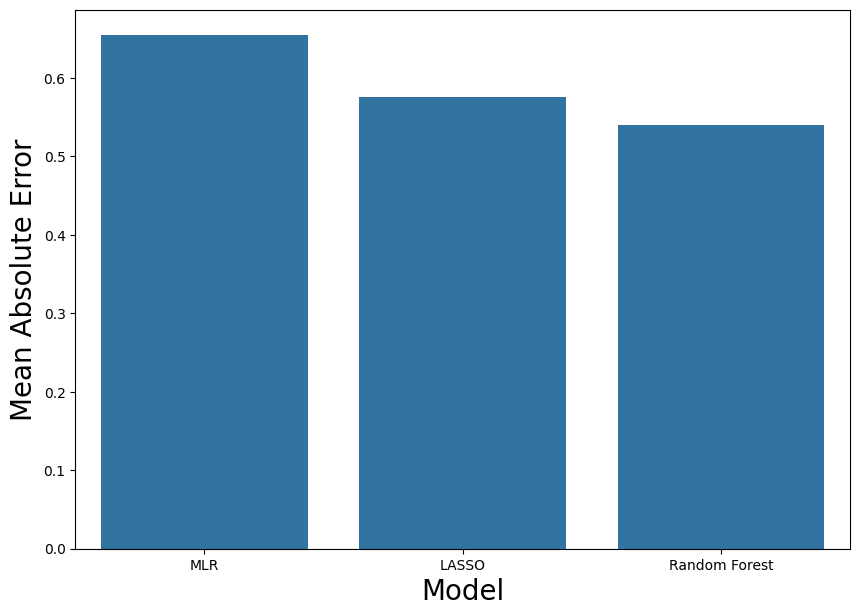

In [131]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

#Based on the MAE, it is concluded that the Random Forest is the best regression model for predicting the Engineering graduate salary because giving least error 0.540 on the predictor variables